In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout, Activation

In [2]:
import splitfolders
import cv2

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from time import time

In [4]:
splitfolders.ratio("<Folder name for dataset>", 
                   output = 'ISL_CUSTOM',
                   seed = 22, ratio = (.7,.2,.1))

Copying files: 942 files [00:09, 96.00 files/s] 


In [19]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ="<path to train directory created in ISL>",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "<path to val directory created in ISL>",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(150,150)
)

Found 657 files belonging to 4 classes.
Found 98 files belonging to 4 classes.


In [20]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [21]:
model = Sequential()

model.add(Conv2D(150, (3, 3), input_shape=( 150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(215, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(190, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 150)     4200      
                                                                 
 activation_12 (Activation)  (None, 148, 148, 150)     0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 150)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 200)       270200    
                                                                 
 activation_13 (Activation)  (None, 72, 72, 200)       0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 200)      0         
 2D)                                                  

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


C:\Users\parul.chutani\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


42/42 [==============================] - 88s 2s/step - loss: 1.4280 - accuracy: 0.3090 - val_loss: 1.3006 - val_accuracy: 0.3980
Epoch 2/10
42/42 [==============================] - 88s 2s/step - loss: 0.5640 - accuracy: 0.7747 - val_loss: 0.1575 - val_accuracy: 0.9184
Epoch 3/10
42/42 [==============================] - 91s 2s/step - loss: 0.0950 - accuracy: 0.9680 - val_loss: 0.0694 - val_accuracy: 0.9796
Epoch 4/10
42/42 [==============================] - 89s 2s/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 3.7314e-04 - val_accuracy: 1.0000
Epoch 5/10
42/42 [==============================] - 92s 2s/step - loss: 2.4963e-04 - accuracy: 1.0000 - val_loss: 8.2427e-04 - val_accuracy: 1.0000
Epoch 6/10
42/42 [==============================] - 92s 2s/step - loss: 1.6532e-04 - accuracy: 1.0000 - val_loss: 2.1777e-04 - val_accuracy: 1.0000
Epoch 7/10
42/42 [==============================] - 91s 2s/step - loss: 9.9084e-05 - accuracy: 1.0000 - val_loss: 1.1433e-04 - val_accuracy: 1.0000
Epo

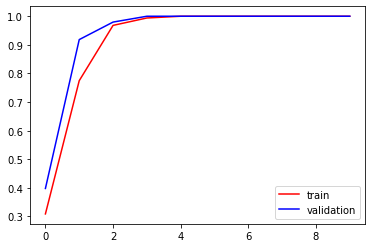

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

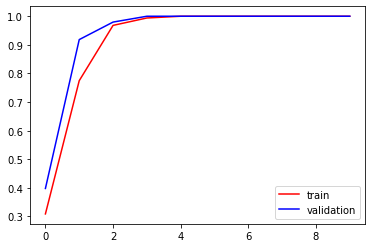

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

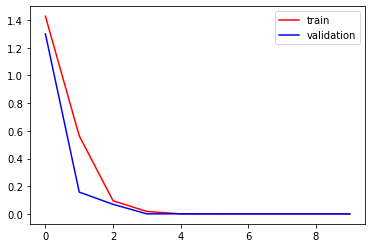

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

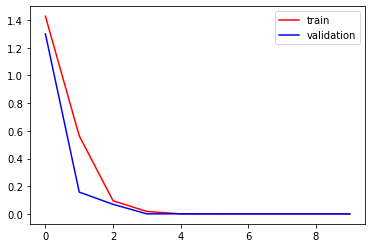

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [43]:
test_img = cv2.imread(r'C:\Users\parul.chutani\Desktop\GesComm\ISL_CUSTOM\test\4/4_200.jpg')

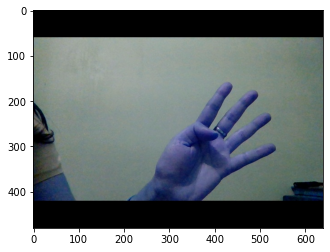

In [44]:
plt.imshow(test_img)

In [45]:
test_img.shape

(480, 640, 3)

In [46]:
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))

In [47]:
model.predict(test_input)

array([[0., 0., 0., 1.]], dtype=float32)

In [ ]:
model.evaluate()